**Importing Packages and Libraries**

In [43]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.optimizers import Adam

**Building the Simple CNN**

In [17]:
vgg16_model = keras.applications.vgg16.VGG16(include_top=False, input_shape=(64,64,3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [18]:
model = Sequential()
for layer in vgg16_model.layers:
    if "pool" in layer.name:
        model.add(BatchNormalization())
    model.add(layer)

In [19]:
NUM_TRAINABLE_LAYERS = len(vgg16_model.layers) - 3
for layer in model.layers[:-NUM_TRAINABLE_LAYERS]:
    layer.trainable = False

In [20]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dense(20, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                        

**Simple CNN Compiling**

In [22]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                        

**Preprocessing Images**

In [24]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

train_datagen = ImageDataGenerator(rescale=1./227,
                                   shear_range=0,
                                   zoom_range=0,
                                   width_shift_range=0,
                                   height_shift_range=0,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./227,
                                   shear_range=0,
                                   zoom_range=0,
                                   width_shift_range=0,
                                   height_shift_range=0,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./227,
                                   shear_range=0,
                                   zoom_range=0,
                                   width_shift_range=0,
                                   height_shift_range=0,
                                   fill_mode='nearest')
batch_size = 30

base_dir = "D:/Land use recognition/data"

training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(64, 64),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')
valid_set = valid_datagen.flow_from_directory(base_dir+'/val',
                                            target_size=(64, 64),
                                            batch_size=batch_size,
                                            class_mode='categorical')

train_num = training_set.samples
valid_num = valid_set.samples

Found 7000 images belonging to 20 classes.
Found 1900 images belonging to 20 classes.


**Setting checkpoints**

In [29]:
from keras.callbacks import ModelCheckpoint
weightpath = "D:/Land use recognition/Landweights.h5"
checkpoints = ModelCheckpoint(weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callback_list = [checkpoints]

**Training the Simple CNN**

In [30]:
history = model.fit(training_set,
                   validation_data=valid_set,
                   epochs=10,
                   callbacks=checkpoints)

Epoch 1/10
234/234 [==============================] - ETA: 0s - loss: 0.8771 - accuracy: 0.7261
Epoch 00001: val_accuracy improved from -inf to 0.80211, saving model to D:/Land use recognition\Landweights.h5
234/234 [==============================] - 603s 3s/step - loss: 0.8771 - accuracy: 0.7261 - val_loss: 0.7317 - val_accuracy: 0.8021
Epoch 2/10
234/234 [==============================] - ETA: 0s - loss: 0.3033 - accuracy: 0.9041
Epoch 00002: val_accuracy did not improve from 0.80211
234/234 [==============================] - 633s 3s/step - loss: 0.3033 - accuracy: 0.9041 - val_loss: 0.7212 - val_accuracy: 0.7847
Epoch 3/10
234/234 [==============================] - ETA: 0s - loss: 0.2144 - accuracy: 0.9290
Epoch 00003: val_accuracy improved from 0.80211 to 0.86895, saving model to D:/Land use recognition\Landweights.h5
234/234 [==============================] - 593s 3s/step - loss: 0.2144 - accuracy: 0.9290 - val_loss: 0.4514 - val_accuracy: 0.8689
Epoch 4/10
234/234 [==============

**Saving**

In [31]:
filepath="D:/Land use recognition/LandUseModel.h5"
model.save(filepath)

**Plotting accuracy and validation**

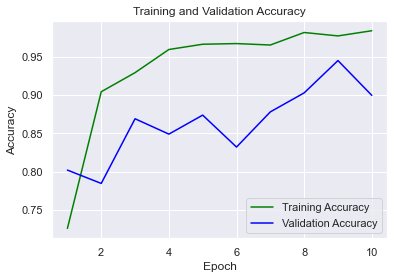

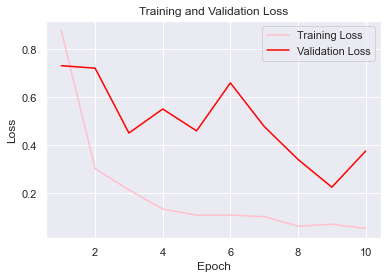

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Building another CNN using transfer learning**

In [33]:
vgg16_model = keras.applications.vgg16.VGG16(include_top=False, input_shape=(64,64,3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [34]:
type(vgg16_model)

keras.engine.functional.Functional

In [35]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)      

In [36]:
NUM_TRAINABLE_LAYERS = 10
for layer in model.layers[:-NUM_TRAINABLE_LAYERS]:
    layer.trainable = False

In [37]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(20, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)      

In [39]:
model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

**Training the second model**

In [40]:
history = model.fit(training_set,
                   validation_data=valid_set,
                   epochs=10,
                   callbacks=checkpoints)

Epoch 1/10
234/234 [==============================] - 465s 2s/step - loss: 1.0005 - accuracy: 0.6694 - val_loss: 0.6071 - val_accuracy: 0.8074
Epoch 2/10
234/234 [==============================] - 461s 2s/step - loss: 0.3926 - accuracy: 0.8719 - val_loss: 0.3268 - val_accuracy: 0.8847
Epoch 3/10
234/234 [==============================] - 446s 2s/step - loss: 0.2167 - accuracy: 0.9319 - val_loss: 0.3120 - val_accuracy: 0.9105
Epoch 4/10
234/234 [==============================] - 441s 2s/step - loss: 0.1279 - accuracy: 0.9586 - val_loss: 0.3682 - val_accuracy: 0.8979
Epoch 5/10
234/234 [==============================] - 452s 2s/step - loss: 0.1215 - accuracy: 0.9610 - val_loss: 0.2343 - val_accuracy: 0.9242
Epoch 6/10
234/234 [==============================] - 459s 2s/step - loss: 0.0904 - accuracy: 0.9724 - val_loss: 0.2044 - val_accuracy: 0.9426
Epoch 7/10
234/234 [==============================] - 463s 2s/step - loss: 0.0815 - accuracy: 0.9743 - val_loss: 0.2387 - val_accuracy: 0.9279

In [41]:
filepath="D:/Land use recognition/LandUseModelFinaltransfer.h5"
model.save(filepath)

**Plotting accuracy and validation values**

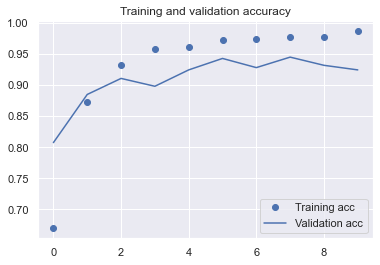

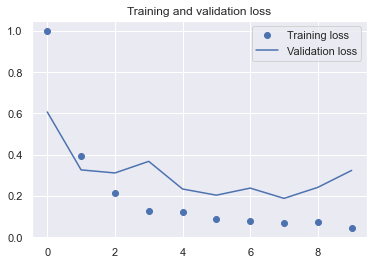

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()